# ARIMA & Seasonal ARIMA

In [39]:
# Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
%matplotlib inline

In [40]:
# Current Working Directory
cwd = os.getcwd()

# Parent Directory
parent = os.path.dirname(cwd)

# Data Directory
data = os.path.join(parent, 'Database/perrin-freres-monthly-champagne.csv')

# Print Directories
print(cwd)
print(parent)
print(data)

/workspaces/monthly-sales-forecasting/Notebooks
/workspaces/monthly-sales-forecasting
/workspaces/monthly-sales-forecasting/Database/perrin-freres-monthly-champagne.csv


In [41]:
# Load Data to a DataFrame
df = pd.read_csv(data)

# Display Data
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [42]:
# Info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Month                                                   106 non-null    object 
 1   Perrin Freres monthly champagne sales millions ?64-?72  105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [43]:
# Set the Column name as Sales for "PePerrin Freres monthly champagne sales millions ?64-?72"
df.columns = ['Month', 'Sales']
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [44]:
# Drop "NaN" Values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB


In [45]:
# Convert Month to Datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [46]:
# Describe Data
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

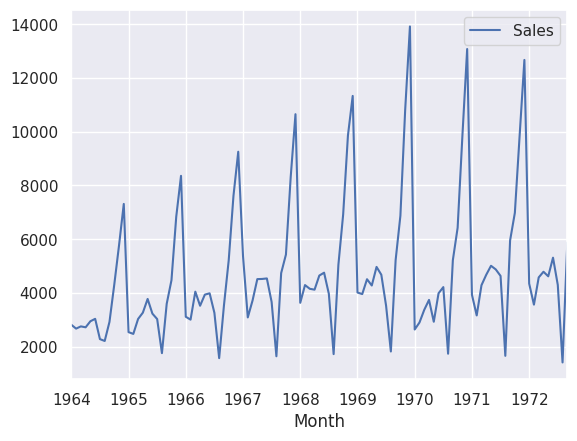

In [47]:
# Plot Data
df.plot()

In [48]:
# Test Stationarity
test_result = adfuller(df['Sales'])

In [49]:
# Hypothesis Testing
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(label + ' : ' + str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary')

In [50]:
# Test
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary
